In [35]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

In [6]:
cols_to_keep=[
    "engine_displacement",
    "horsepower",
    "vehicle_weight",
    "model_year",
    "fuel_efficiency_mpg"
]

In [7]:
data = df[cols_to_keep].copy()

In [8]:
data.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [10]:
data.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

<Axes: ylabel='Frequency'>

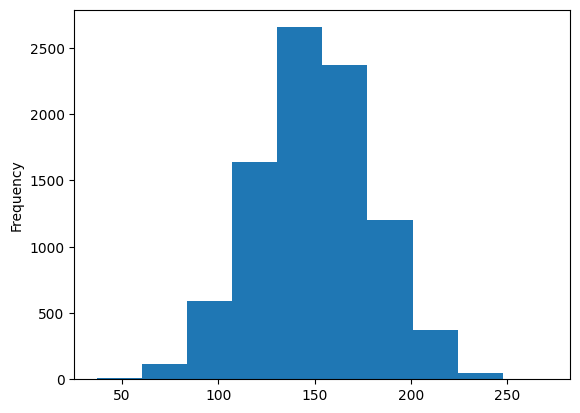

In [11]:
data.horsepower.plot.hist()

In [12]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].mean())

In [13]:
data.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [14]:
# First split: train (60%) and temp (40%)
train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)

# Second split: val (20%) and test (20%) from temp (which is 40% of original)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Check the sizes
print(f"Train: {len(train_data)}, Val: {len(val_data)}, Test: {len(test_data)}")

Train: 5822, Val: 1941, Test: 1941


In [17]:
# Remove the target column from each split to get features
X_train = train_data.drop(columns=['fuel_efficiency_mpg'])
X_val = val_data.drop(columns=['fuel_efficiency_mpg'])
X_test = test_data.drop(columns=['fuel_efficiency_mpg'])

# Extract the target column from each split
y_train = train_data['fuel_efficiency_mpg']
y_val = val_data['fuel_efficiency_mpg']
y_test = test_data['fuel_efficiency_mpg']

In [26]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_preds = model.predict(X_val)

In [36]:
score = np.sqrt(mean_squared_error(y_val, y_preds))
score

np.float64(0.4603574316359188)